<a href="https://colab.research.google.com/github/venkatarajeshzilla/zomoto_data_analysis_project/blob/main/zomoto_DataAnalysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zomoto Data analysis project

In [1]:
#importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataframe=pd.read_csv('/content/Zomato data .csv')

In [4]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
#convert the data type of column -rate
def handleRate(value):
  if isinstance(value,str):
    value=value.split('/')[0]
    value=value.replace(',','')
    return float(value)
  else:
    return value
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe['rate'])


0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64


In [6]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Types of resturant

Text(0, 0.5, 'Count')

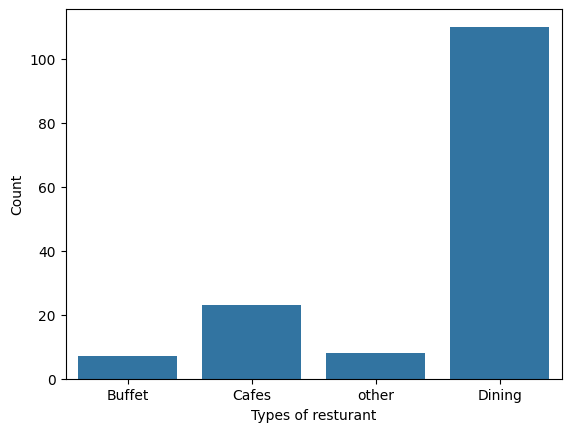

In [9]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel('Types of resturant')
plt.ylabel('Count')

conclusion: majority of resturant falls in dinning category

Text(0, 0.5, 'votes')

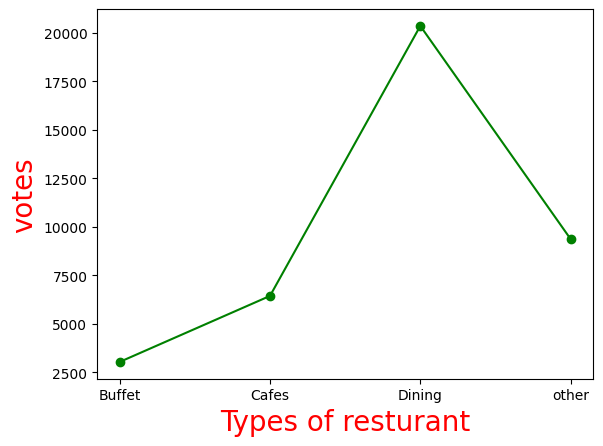

In [11]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of resturant',c="red",size=20)
plt.ylabel('votes',c="red",size=20)

Comclusion -Dinning resturants has maximum votes

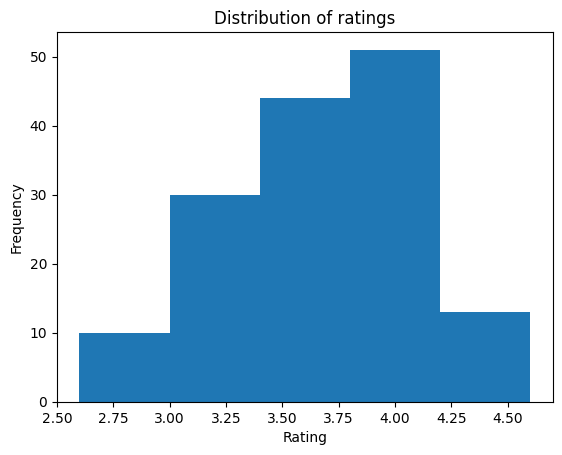

In [12]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Distribution of ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Conclusion -the majority resturents recived ratings from 3.5 to 4

Text(0, 0.5, 'Count')

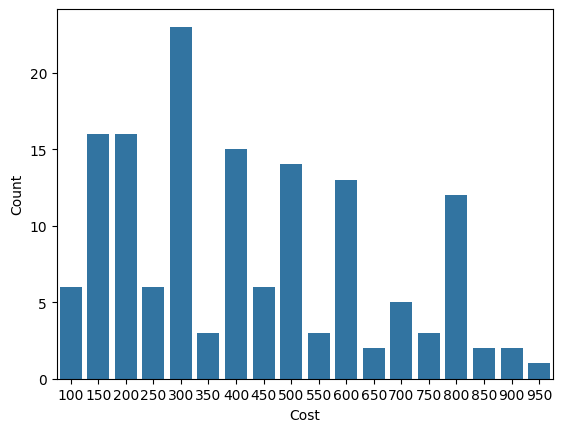

In [15]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Cost')
plt.ylabel('Count')

conclusion -the majority of couples prefer resturent with an approximet cost of 300 rupees

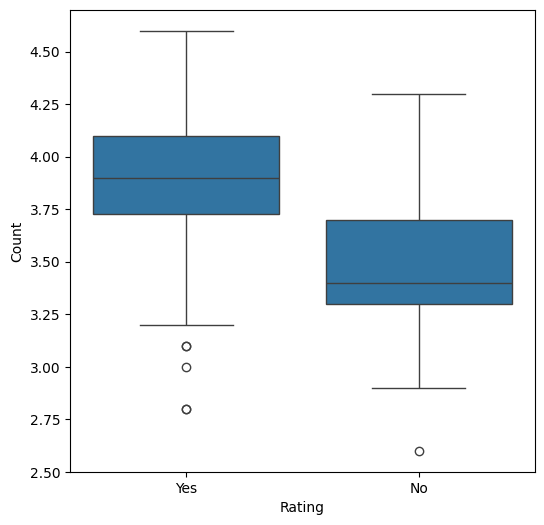

In [16]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

coclusion offline order resiving lower ratings comparision to online order

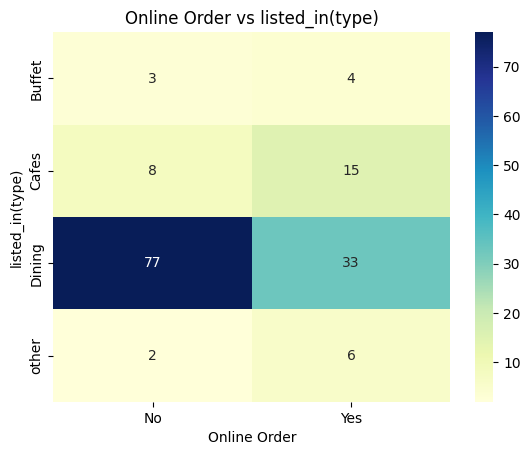

In [17]:
pivot_table=dataframe.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.xlabel('Online Order')
plt.ylabel('listed_in(type)')
plt.title('Online Order vs listed_in(type)')
plt.show()

conclusion-Dinning restaurants primarily accepts offline orders,where cafes primarily recives online orders,This suggests the clients prefers orders in person at restaurants,but prefer online orderings at cafes